# <center> <img src="figs/LogoUFSCar.jpg" alt="Logo UFScar" width="110" align="left"/>  <br/> <center>Universidade Federal de São Carlos (UFSCar)<br/><font size="4"> Departamento de Computação, campus Sorocaba</center></font>
</p>

<font size="4"><center><b>Disciplina: Aprendizado de Máquina</b></center></font>
  
<font size="3"><center>Prof. Dr. Tiago A. Almeida</center></font>

## <center>Projeto Final</center>

**Nome**: Beatriz Rogers Tripoli Barbosa

**RA**: 792170 

**Nome**: Laura Naomi Seto

**RA**: 813210


---
## Análise exploratória

Nesta seção, deve ser feita a leitura da base de dados e todas as análises necessárias para interpretar e analisar os dados, tais como:
* Significado de cada atributo
* Medidas descritivas
* Gráficos

### Análise dos atributos

A seguir, estão listados todos os atributos provenientes da base de dados, com seus respectivos problemas em potencial identificados em uma análise prévia:

* **Id**: Identificação única do registro.

* **Peso**: Peso corporal do paciente [kg]
    * valores faltantes

* **Altura**: Altura do paciente [cm]
    * valores fora do intervalo aceitável (0 é válido?)

* **Índice de Massa Corporal** (IMC): $$\frac{Peso}{Altura^2}$$    
    * valores fora do intervalo válido
    * valores faltantes acarretados por: peso ou altura não registrados ou igual a 0

* **Atendimento**: Data de atendimento [DD/MM/AA]
    * valores inválidos

* **Data de Nascimento** (DN): Data de nascimento [DD/MM/AA]
    * valores faltantes
    * valores inválidos

* **Idade**: Idade no momento do atendimento [anos]
    * valores não numéricos ('#VALUE!') acarretados por: atendimento e/ou data de nascimento inválidos 
    * valores fora do intervalo aceitável (idades negativas e pacientes não pediátricos)
    * valores faltantes acarretados por: data de nascimento não registrado
    * valores aparentemente válidos mas atendimento e/ou data de nascimento inválidos

* **Convênio**: Tipo de plano de saúde utilizado para o atendimento

* **Pulsos**: Avaliação da presença e qualidade dos pulsos arteriais [normais, outro, amplos, femorais diminuidos, diminuídos]
    * adotar formas canônicas para os valores possíveis
    * tratamneto por moda baseado na classe
    * conversão simbólico-numérico com **label encoding (ordinal) ou hot-one encoding (nominal)**

* **PA Sistólica**: Valor mais alto registrado durante o batimento cardíaco [mmHg]
    * valores fora fora do intervalo aceitável
    * valores faltantes

* **PA Diastólica**: Valor mais baixo registrado entre os batimentos cardíacos [mmHg]
    * valores fora do intervalo aceitável
    * valores faltantes 

* **Pressão de Pulso Arterial** (PPA): [normal, pre-hipertensão pas, pre-hipertensão pad, has-1 pas, has-1 pad, has-2 pas, has-2 pad]
    * valor inválido ('#VALUE!')
    * conversão simbólico-numérico com label encoding (ordinal)

* **B2**: Segundo som cardíaco [normal, desdob fixo, outro, hiperfonética, única]
    * valores fantantes
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Sopro**: Sopro cardíaco [ausente, sistólico, diastólico, contínuo, 'sistolico e diastólico']
    * adotar formas canônicas para os valores possíveis 
    * conversão simbólico-numérico com label encoding (ordinal): progressão de anormalidade e gravidade

* **Frequência Cardíaca** (FC): Número de batimentos cardíacos por minuto [bpm]
    * valores faltantes
    * valores fora do intervalo aceitável
    * adotar forma canônica para os valores (ex: 123 ou 100-130)
        * valores não numéricos transformados em NaN
        
* **História da Doença Atual 1** (HDA 1): registro de um problema de saúde do paciente
    * obs: valores faltantes podem ser: erro de registro ou indicação de histórico inexistente
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **História da Doença Atual 2** (HDA2): registro de um problema de saúde do paciente
    * obs: valores faltantes podem ser: erro de registro ou indicação de histórico inexistente
    * REMOVIDA: 96% dos registros tinham este campo não preenchido

* **Sexo**: Gênero biológico do paciente [masculino, feminino e indeterminado]
    * adotar formas canônicas para os valores possíveis
    * tratamento por moda
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Motivo 1**: Principal motivo para o atendimento ['6 - Suspeita de cardiopatia', '2 - Check-up', '5 - Parecer cardiológico', '1 - Cardiopatia já estabelecida', nan, '7 - Outro']
    * valores faltantes
    * tratamento por substituição por valor padrão
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Motivo 2**: Motivo secundário para o atendimento ['6 - Palpitação/taquicardia/arritmia', '6 - Dispnéia', nan, '5 - Atividade física', '5 - Cirurgia', '6 - Sopro', '1 - Cardiopatia adquirida', '1 - Cardiopatia congenica', '6 - Dor precordial', '6 - HAS/dislipidemia/obesidade', '6 - Cianose', 'Outro', '6 - Alterações de pulso/perfusão', '6 - Cardiopatia na familia', '6 - Cansaço', '5 - Uso de cisaprida', '6 - Cianose e dispnéia']
    * valores faltantes
    * tratamento por substituição por valor padrão
    * conversão simbólico-numérico com hot-one encoding (nominal)

* **Classe**: [normal, anormal]
    * adotar formas canônicas para os valores possíveis

In [32]:
# biblioteca usada para trabalhar com vetores e matrizes
import numpy as np 

# biblioteca usada para trabalhar com dataframes e análise de dados
import pandas as pd

# bibliotecas usadas para geração de graficos
import seaborn as sns
import matplotlib.pyplot as plt

# importando scripts 
from scripts.analise_exploratoria import *
from scripts.preprocessamento import *

print('Bibliotecas carregadas com sucesso')

Bibliotecas carregadas com sucesso


In [33]:
# importa o arquivo e guarda em um dataframe do Pandas
df_dataset = pd.read_csv( 'data/RHP_data.csv', sep=',', index_col=None) 

# TREINO
df_train_id = pd.read_csv('data/train.csv', sep=',', index_col=None)

# TESTE
df_test_id = pd.read_csv('data/test.csv', sep=',', index_col=None)

print('Dados importados com sucesso!')

Dados importados com sucesso!


In [34]:

# TREINO
# recuperar as partições por Id e concatenar o coluna alvo CLASSE
print("Registros de treino fornecidos: ", df_train_id.shape)
df_train = pd.merge(df_dataset, df_train_id, on='Id')
# remover os registros de treino que não possuem atributo alvo classificado
df_train = df_train.dropna(subset=['CLASSE'], axis=0).reset_index(drop=True)
print("Registros de treino classificados: ", df_train.shape)

# TESTE
df_test =  pd.merge(df_dataset, df_test_id, on='Id')
print("Registros de teste fornecidos: ", df_test.shape)

Registros de treino fornecidos:  (14727, 2)
Registros de treino classificados:  (13559, 21)
Registros de teste fornecidos:  (3146, 20)


In [35]:
# ANÁLISE DE VALORES FALTANTES
analise_valores_faltantes(df_train)
analise_valores_faltantes(df_test)

Relação de atributos e porcentagem de nulos: 


,qtd,%
Id,0.0,0.000000
Peso,252.0,1.858544
Altura,0.0,0.000000
IMC,3178.0,23.438307
Atendimento,225.0,1.659414
DN,604.0,4.454606
IDADE,604.0,4.454606
Convenio,3711.0,27.369275
PULSOS,46.0,0.339258
PA SISTOLICA,5339.0,39.376060


Relação de atributos e porcentagem de nulos: 


,qtd,%
Id,0.0,0.000000
Peso,58.0,1.843611
Altura,0.0,0.000000
IMC,710.0,22.568341
Atendimento,0.0,0.000000
DN,0.0,0.000000
IDADE,0.0,0.000000
Convenio,811.0,25.778767
PULSOS,6.0,0.190718
PA SISTOLICA,1235.0,39.256198


---
### Pré-processamento

Nesta seção, as funções da etapa de pré-processamento dos dados devem ser implementadas e aplicadas (se necessário).

##### Abordagens
**Valores faltantes e inválidos** - analisar porcentagem de valores faltantes e natureza dos dados (numérico, categórico, temporais)
- exclusão de linha (poucos faltantes)
- exclusão de coluna (muitos faltantes)
- substituição por média, mediana (melhor quando há outliers) ou moda (dados categóricos)
- substituição por interpolação (adequada para séries temporais)

**Duplicatas** (todos os valores de atributos iguais e mesma classificação) 
- exclusão de linha

**Inconsistências** (todos os valores de atributos iguais e classificados diferentemente)
- exclusão das linhas

In [36]:
# EXCLUIR ATRIBUTOS CONSIDERADOS IRRELEVANTES

# TREINO
df_train = df_train.drop(columns=['Atendimento', 'DN', 'Convenio', 'PPA', 'HDA2', 'MOTIVO2'], axis=1)

# TESTE
df_test = df_test.drop(columns=['Atendimento', 'DN', 'Convenio', 'PPA', 'HDA2', 'MOTIVO2'], axis=1)


In [37]:
col_numerica = ['IMC', 'Peso', 'Altura', 'IDADE', 'PA SISTOLICA', 'PA DIASTOLICA', 'FC']   
col_categorica = ['PULSOS', 'B2', 'SOPRO', 'HDA 1', 'SEXO', 'MOTIVO1']
col_temporais = ['Atendimento', 'DN']

col_nominal = ["PULSOS", "B2", "SOPRO", "SEXO"]
col_ordinal = ["HDA 1", "MOTIVO1"]

# categoria_ppa = [
#     'normal', 
#     'pre-hipertensão pas', 
#     'pre-hipertensão pad', 
#     'has-1 pas', 
#     'has-1 pad', 
#     'has-2 pas', 
#     'has-2 pad'
# ]
categoria_hda1 = [
    'assintomático', 
    'ganho de peso', 
    'palpitacao', 
    'dor precordial', 
    'dispneia',
    'desmaio/tontura',
    'cianose',
    'outro'
]
categoria_motivo1 = [
    '2 - check-up',
    '7 - outro',
    '6 - suspeita de cardiopatia',
    '5 - parecer cardiológico',
    '1 - cardiopatia já estabelecida'
]

In [38]:
# IDENTIFICAR VALORES INVÁLIDOS NO TREINO

# ATRIBUTOS NUMÉRICOS
    # transformando não numéricos em NaN
df_train[col_numerica] = invalidar_nao_numerico(df_train, col_numerica)
        # Restrições do domínio
df_train['IDADE'] = df_train['IDADE'].apply(lambda x: x if 0<=x else np.nan)
df_train['Peso'] = df_train['Peso'].apply(lambda x: x if 0<=x else np.nan)
df_train['Altura'] = df_train['Altura'].apply(lambda x: x if 0<=x else np.nan)


# ATRIBUTOS CATEGÓRICOS
    # transformando para forma canônica (lower case)
df_train[col_categorica] = padronizar_string(df_train, col_categorica)
        # SEXO
df_train['SEXO'] = df_train['SEXO'].apply(lambda x: 'f' if x in ['f', 'feminino'] else 'm' if x in ['m', 'masculino'] else np.nan)
       
        # CLASSE
df_train['CLASSE'] = df_train['CLASSE'].apply(lambda x: 'normal' if x in ['Normal', 'Normais'] else 'anormal' if x in ['Anormal'] else np.nan)

In [39]:
# REMOVENDO REGISTROS ADULTOS

df_train = remover_registros_adultos(df_train)

In [40]:
# IDENTIFICAR VALORES INVÁLIDOS NO TESTE

df_test[col_numerica] = invalidar_nao_numerico(df_test, col_numerica)
        # Restrições do domínio
df_train['IDADE'] = df_train['IDADE'].apply(lambda x: x if x>=0 else np.nan)
df_train['Peso'] = df_train['Peso'].apply(lambda x: x if x>=0 else np.nan)
df_train['Altura'] = df_train['Altura'].apply(lambda x: x if x>=0 else np.nan)


df_test[col_categorica] = padronizar_string(df_test, col_categorica)
        # SEXO
df_test['SEXO'] = df_test['SEXO'].apply(lambda x: 'f' if x in ['f', 'feminino'] else 'm' if x in ['m', 'masculino'] else np.nan)

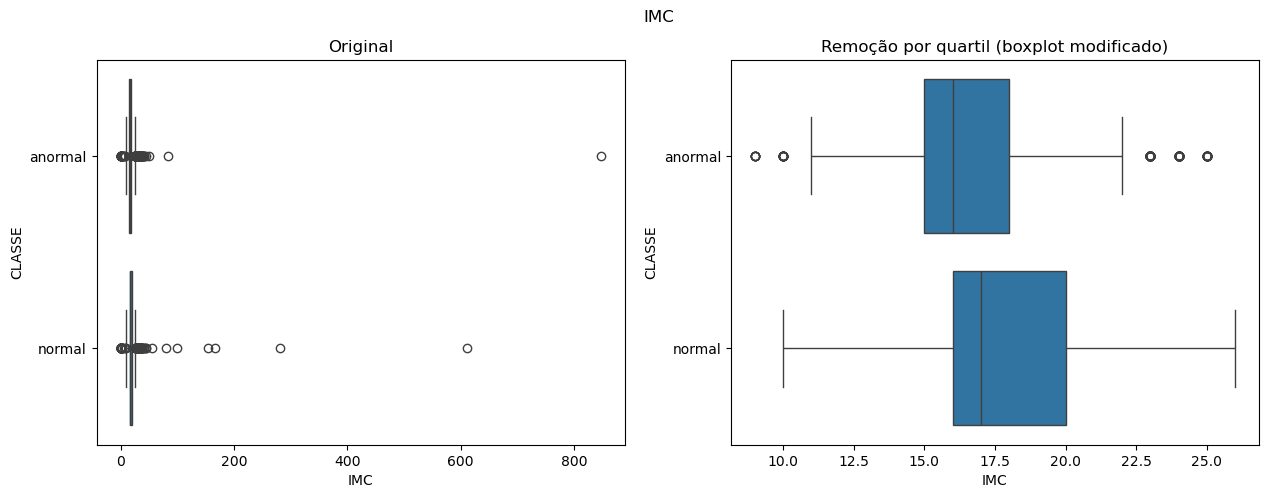

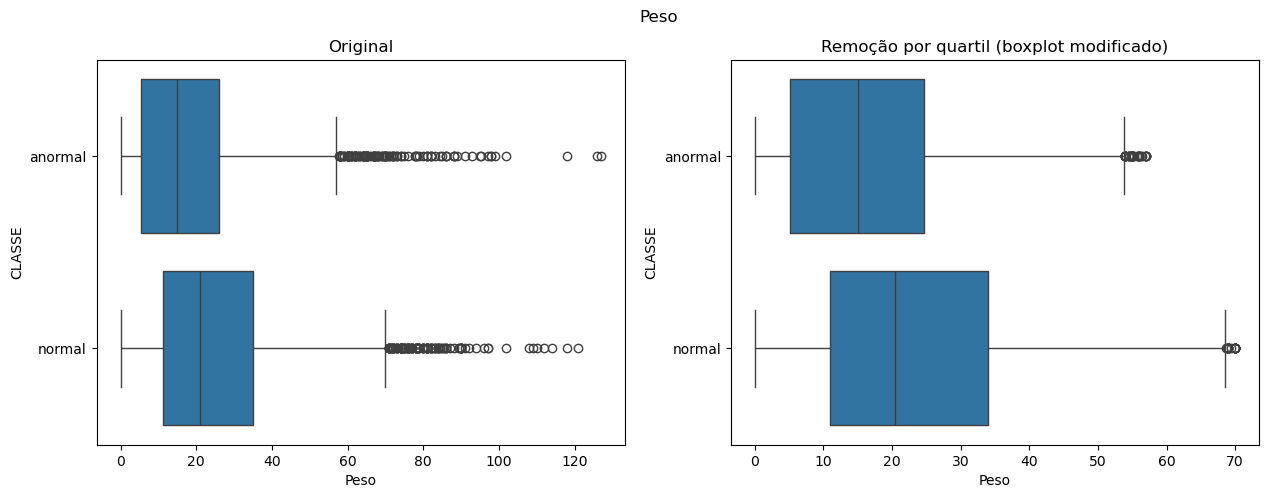

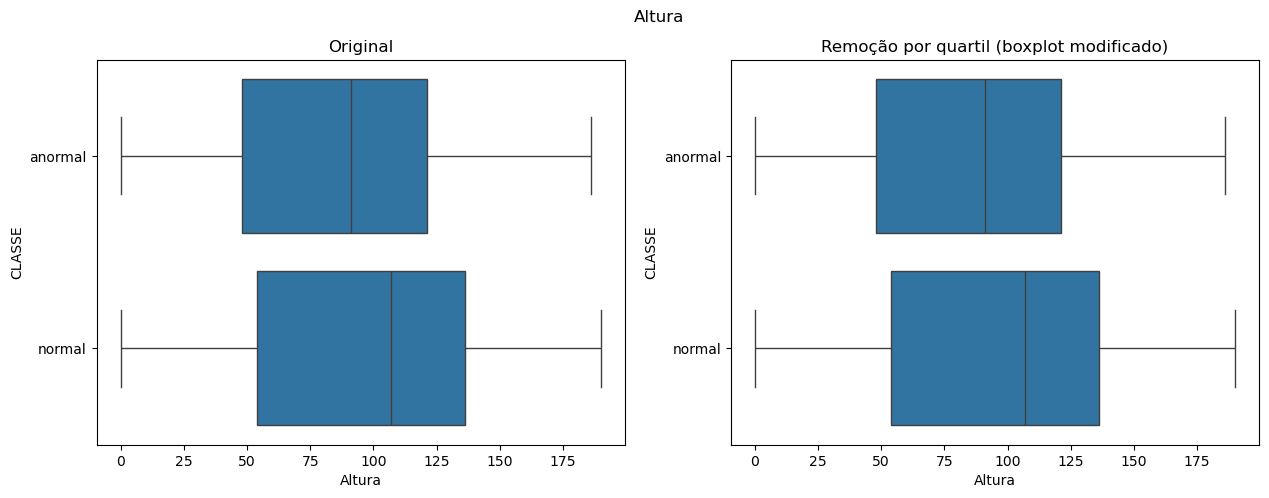

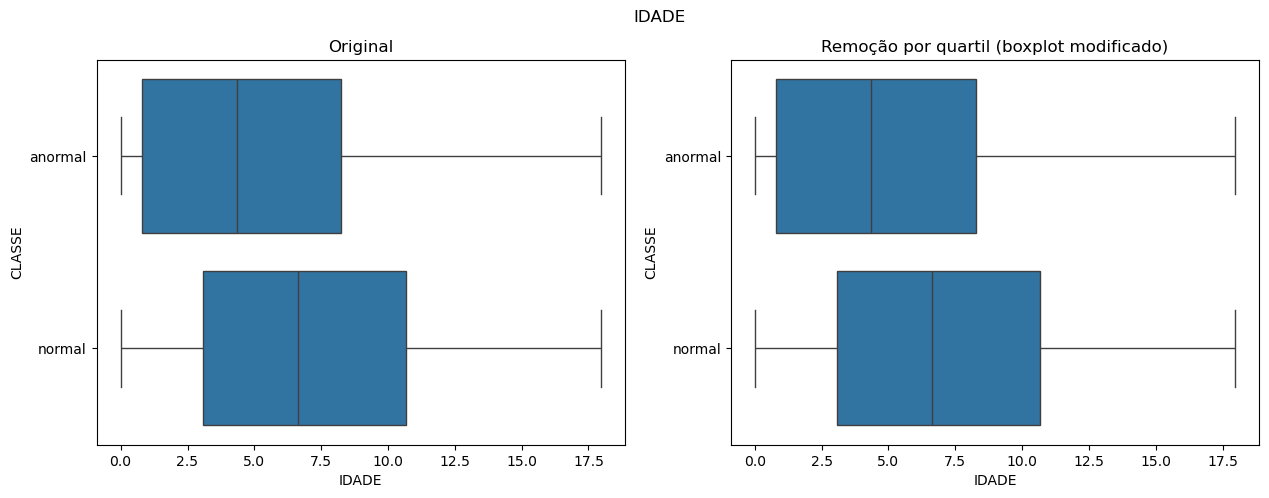

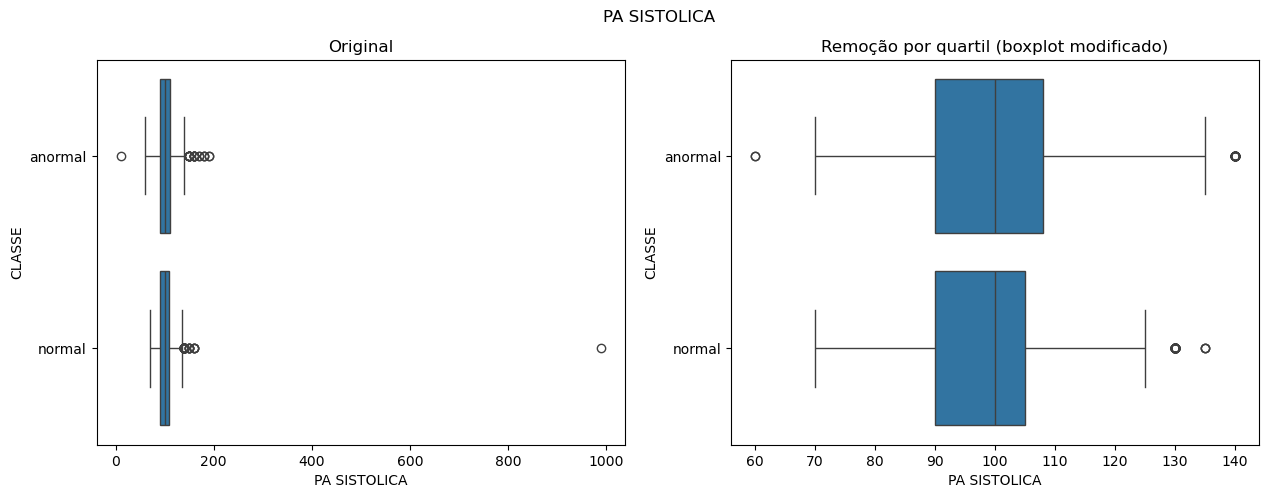

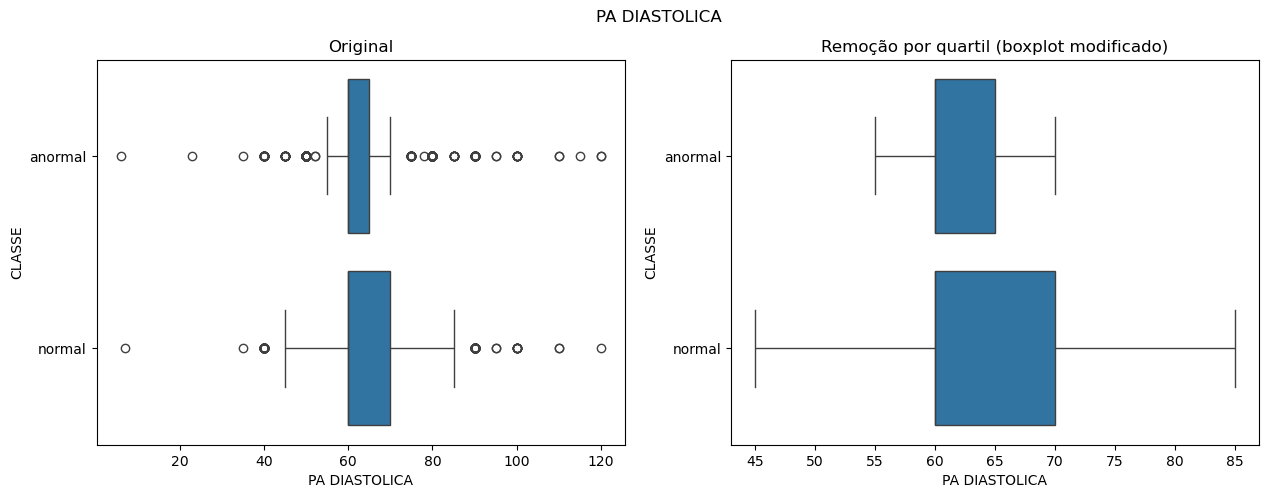

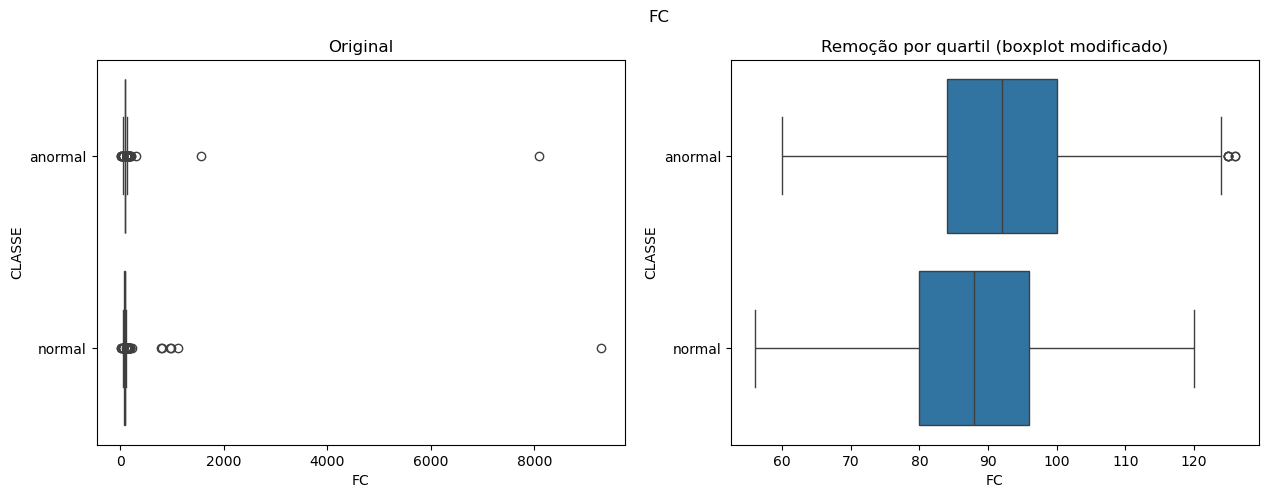

In [41]:
# IDENTIFICAR OUTLIERS SEM CONSIDERAR RELAÇÃO ENTRE ATRIBUTOS

# identificação de outliers por atributo (método boxplot modificado)
df_aux1 = invalidar_outliers_quartil(df_train, col_numerica)

for coluna in col_numerica:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=False, sharey=False)
    fig.suptitle(f"{coluna}")
    
    sns.boxplot(df_train, x=coluna, y='CLASSE', ax=axes[0])
    axes[0].set_title(f"Original")

    sns.boxplot(df_aux1, x=coluna, y='CLASSE', ax=axes[1])
    axes[1].set_title(f"Remoção por quartil (boxplot modificado)")
    plt.show()

df_train = df_aux1


In [42]:
# EXCLUIR REGISTROS COM MENOS DE 50% DOS VALORES PREENCHIDOS 

analise_registro_incompleto(df_train, 0.5)
df_train = remover_registros_incompletos(df_train, 0.5).reset_index(drop=True)

print("Conjunto de treino sem registros com baixa taxa de preenchimento: ", df_train.shape)

16 de 13424 (0.11918951132300357%) registros com mais de 50.0% dos atributos faltantes
Conjunto de treino sem registros com baixa taxa de preenchimento:  (13408, 15)


In [43]:
# GERANDO DIFERENTES IMPUTADORES (já ajustado com o conjunto de treino!)

imputador_3nn = imputador_faltantes_knn(df_train, col_numerica, 3)
imputador_media = imputador_faltantes_media(df_train, col_numerica)
imputador_mediana = imputador_faltantes_mediana(df_train, col_numerica)

imputador_moda = imputador_faltantes_moda(df_train, col_categorica)


In [44]:
# IMPUTANDO DADOS NUMÉRICOS

df_train_imputed_3nn = pd.DataFrame(imputador_3nn.transform(df_train[col_numerica]), columns=col_numerica)
df_train_imputed_media = pd.DataFrame(imputador_media.transform(df_train[col_numerica]), columns=col_numerica)
df_train_imputed_mediana = pd.DataFrame(imputador_mediana.transform(df_train[col_numerica]), columns=col_numerica)

Relação de atributos e porcentagem de nulos: 


,qtd,%
IMC,3566.0,26.596062
Peso,510.0,3.803699
Altura,0.0,0.000000
IDADE,825.0,6.153043
PA SISTOLICA,5398.0,40.259547
PA DIASTOLICA,6075.0,45.308771
FC,1358.0,10.128282


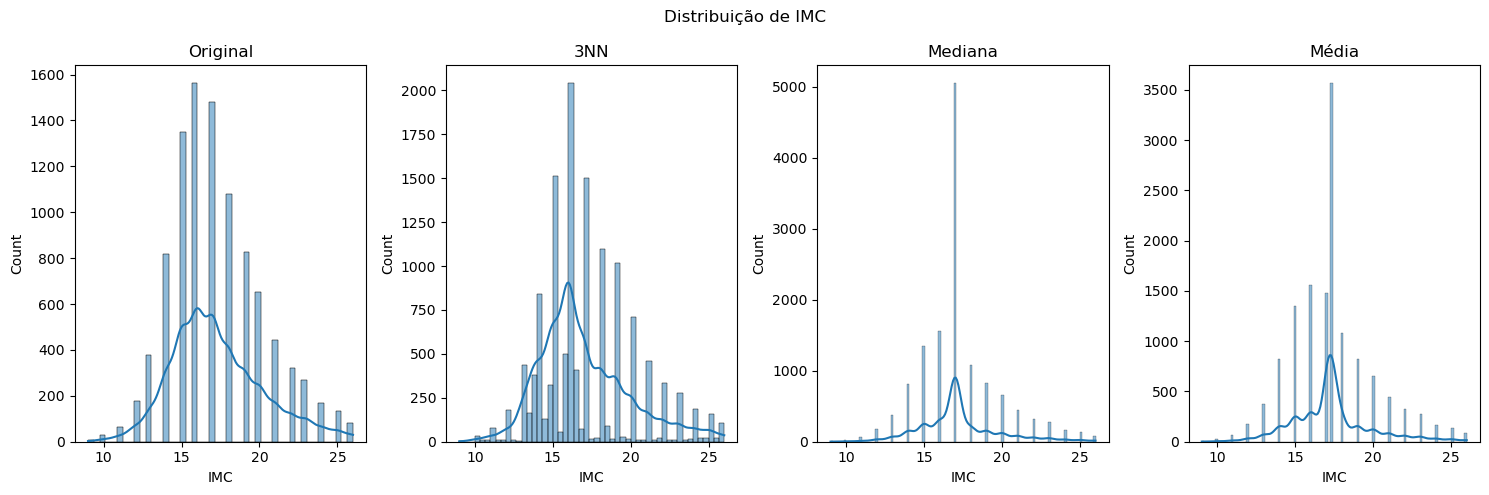

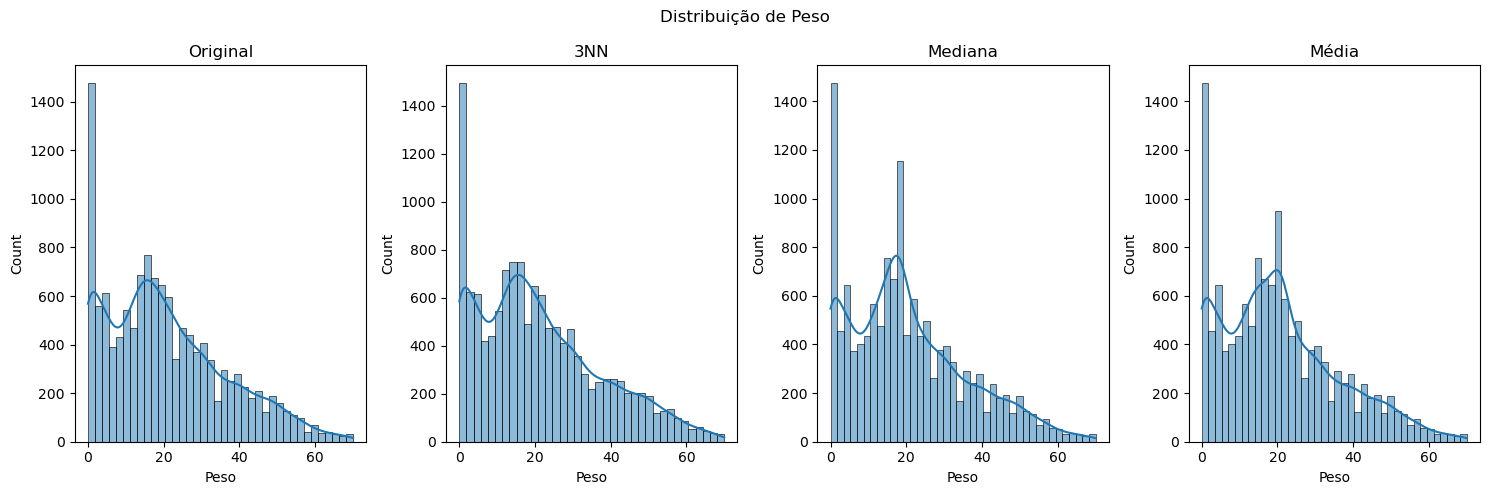

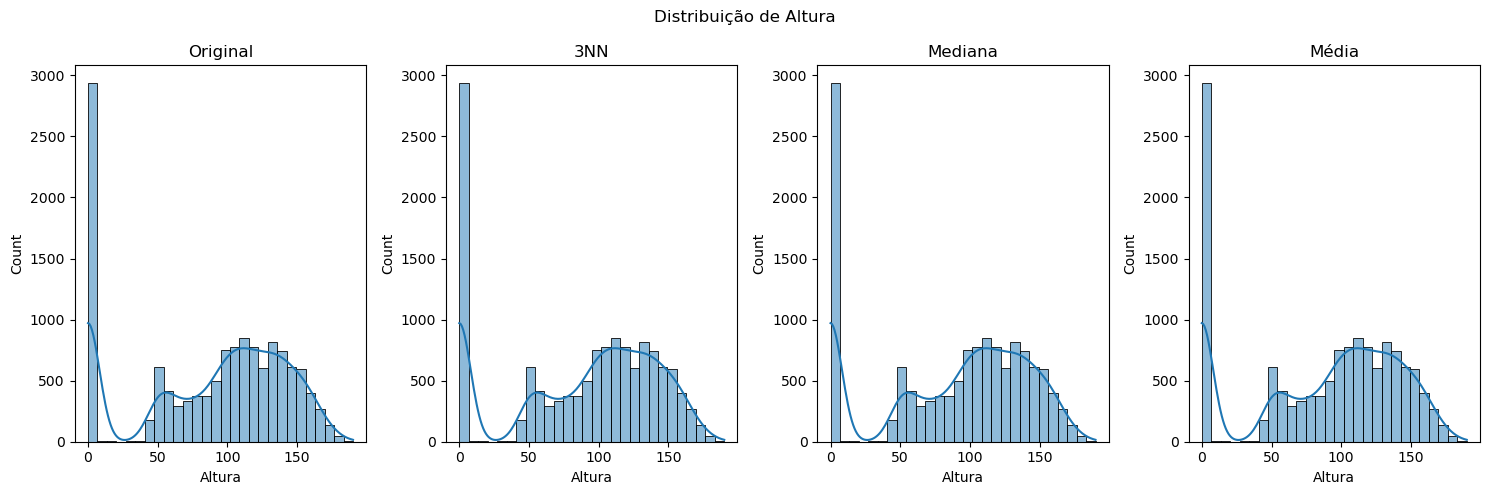

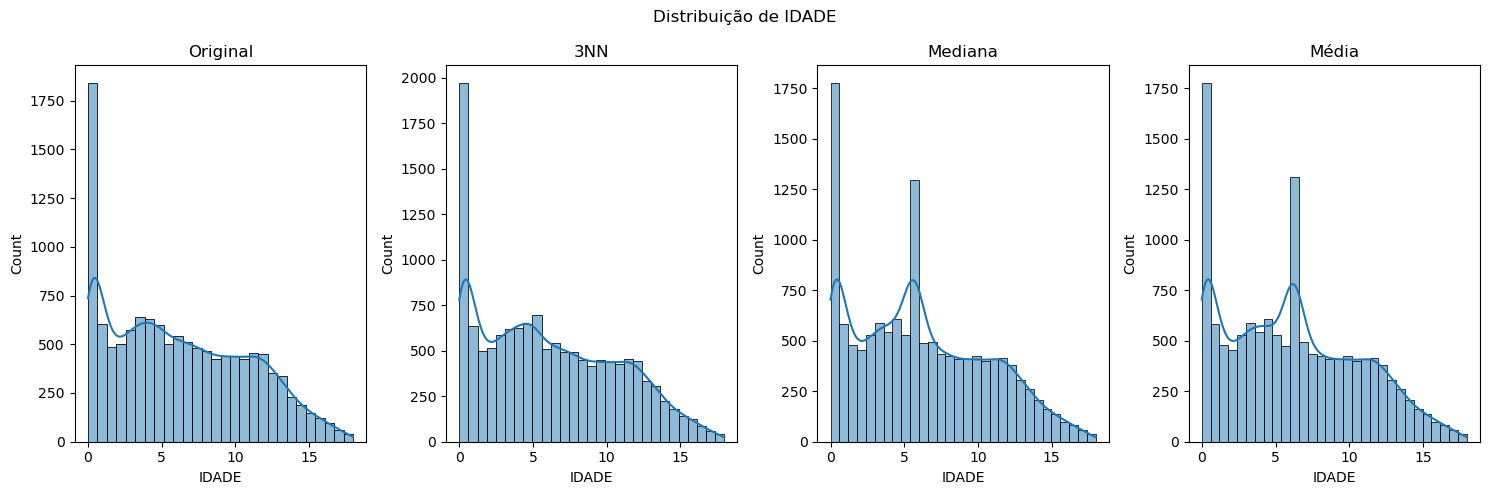

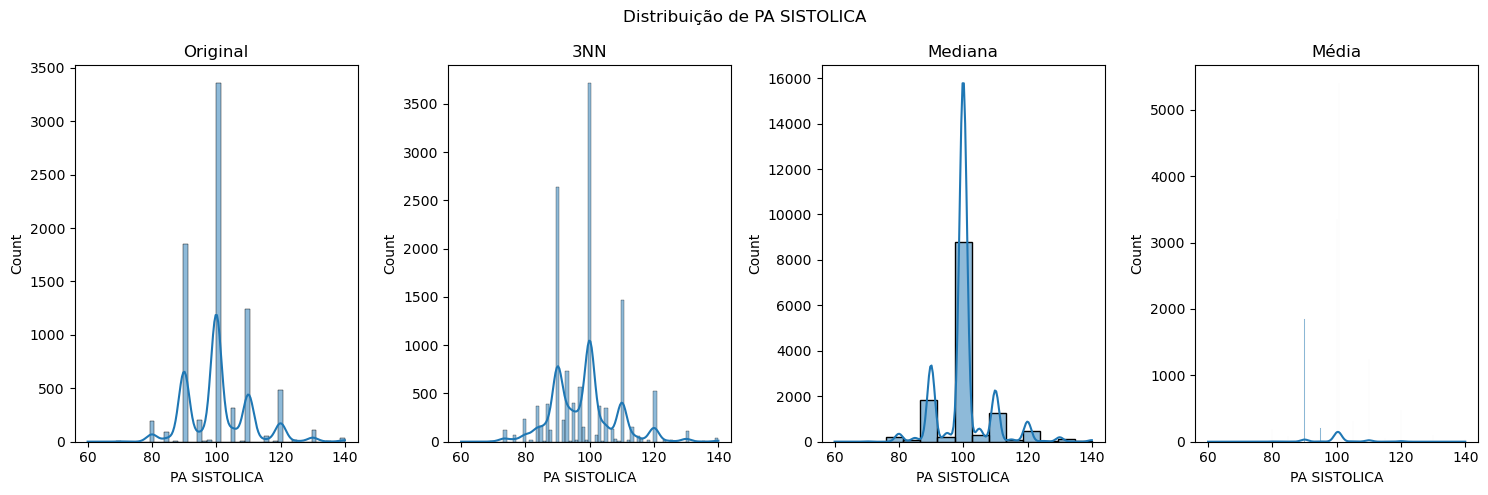

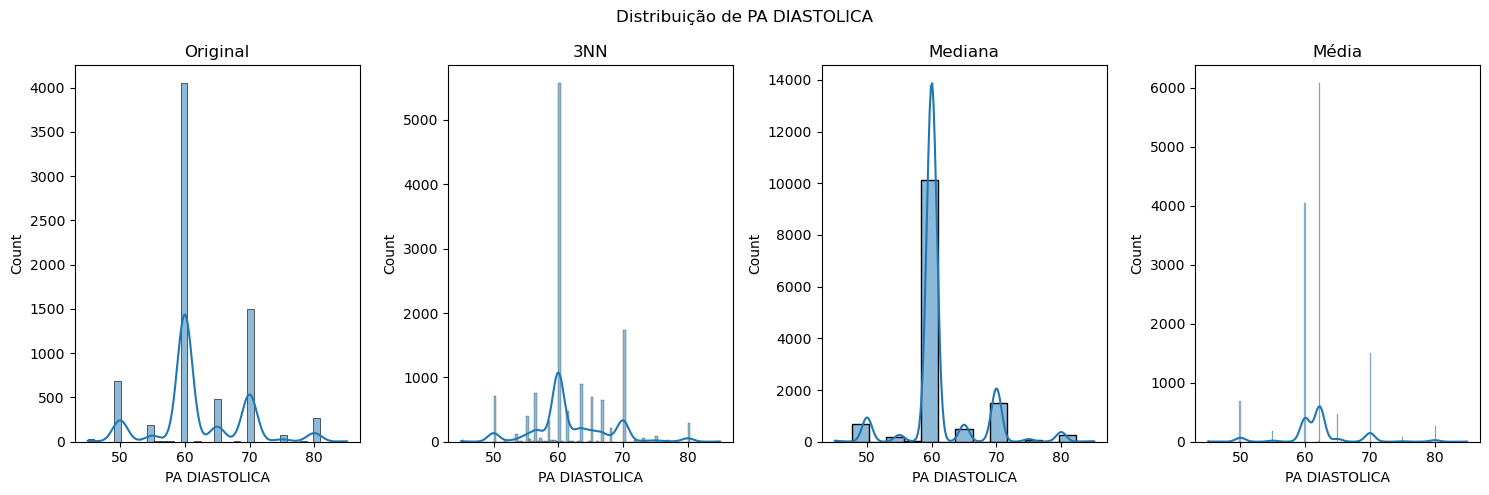

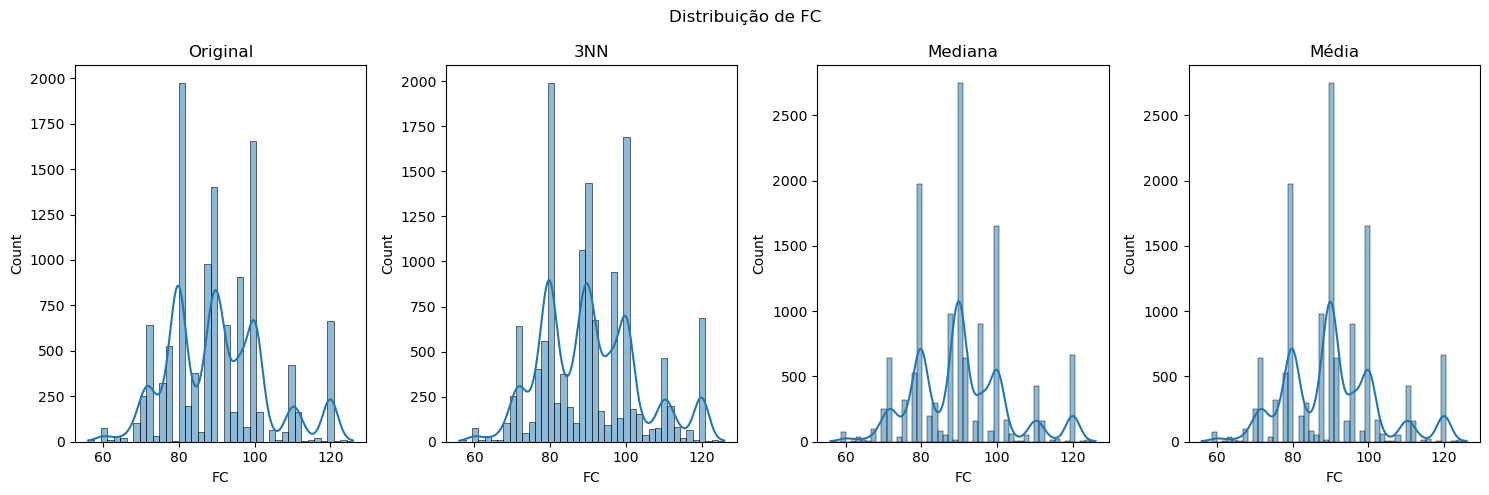

In [45]:
# COMPARANDO DISTRIBUIÇÃO ORIGINAL E DOS IMPUTADOS


analise_valores_faltantes(df_train[col_numerica])

for coluna in col_numerica:
    fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=False, sharey=False)
    fig.suptitle(f"Distribuição de {coluna}")
    # axes.set_xlabel("Valor")

    sns.histplot(df_train[coluna], ax=axes[0], kde=True)
    axes[0].set_title(f"Original")

    sns.histplot(df_train_imputed_3nn[coluna], ax=axes[1], kde=True)
    axes[1].set_title(f"3NN")
    
    sns.histplot(df_train_imputed_mediana[coluna], ax=axes[2], kde=True)
    axes[2].set_title(f"Mediana")
    
    sns.histplot(df_train_imputed_media[coluna], ax=axes[3], kde=True)
    axes[3].set_title(f"Média")

    plt.tight_layout()    
    plt.show()

In [46]:
# IMPUTANDO DADOS CATEGÓRICOS

df_imputed_moda = pd.DataFrame(imputador_moda.transform(df_train[col_categorica]), columns=col_categorica)

Relação de atributos e porcentagem de nulos: 


,qtd,%
PULSOS,30.0,0.223747
B2,15.0,0.111874
SOPRO,6.0,0.044749
HDA 1,3433.0,25.604117
SEXO,573.0,4.273568
MOTIVO1,279.0,2.080847


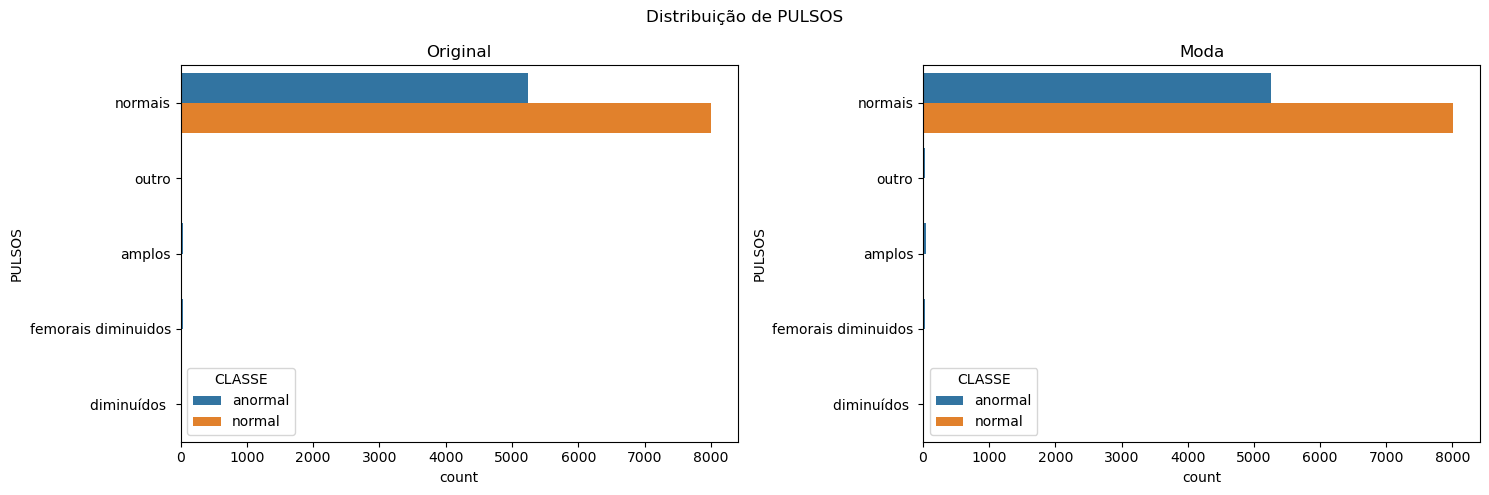

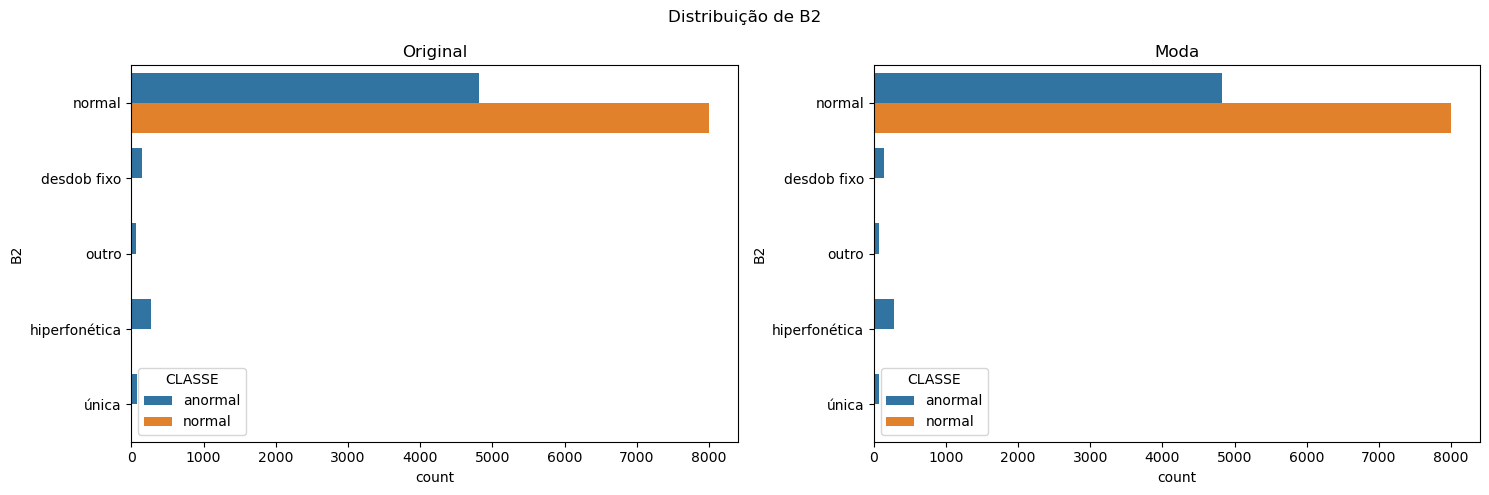

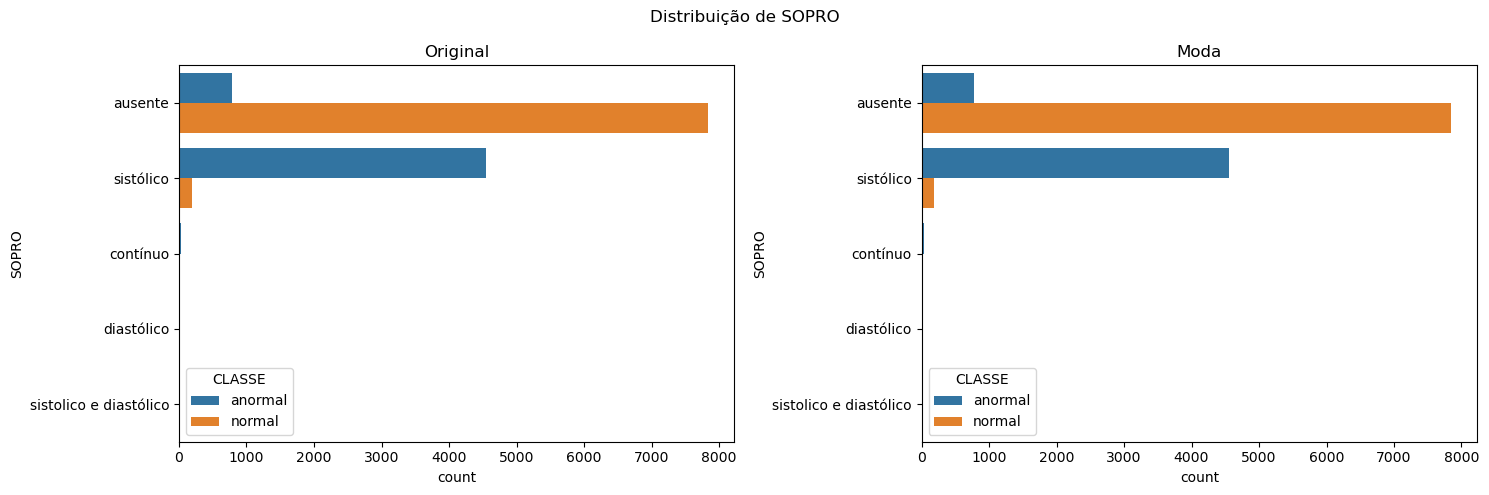

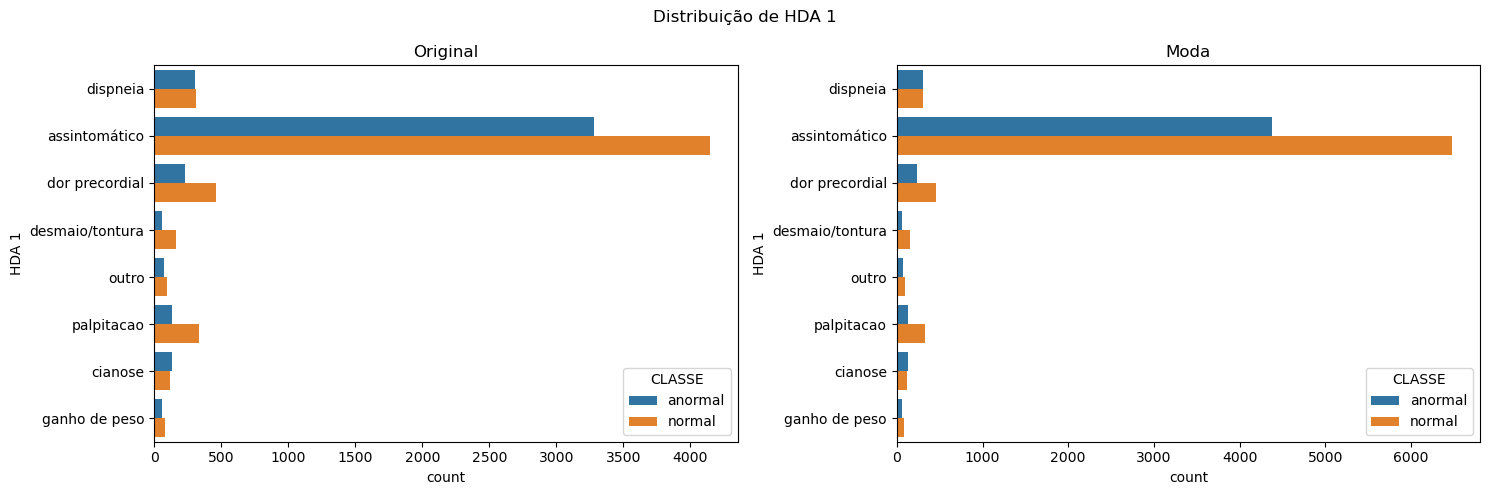

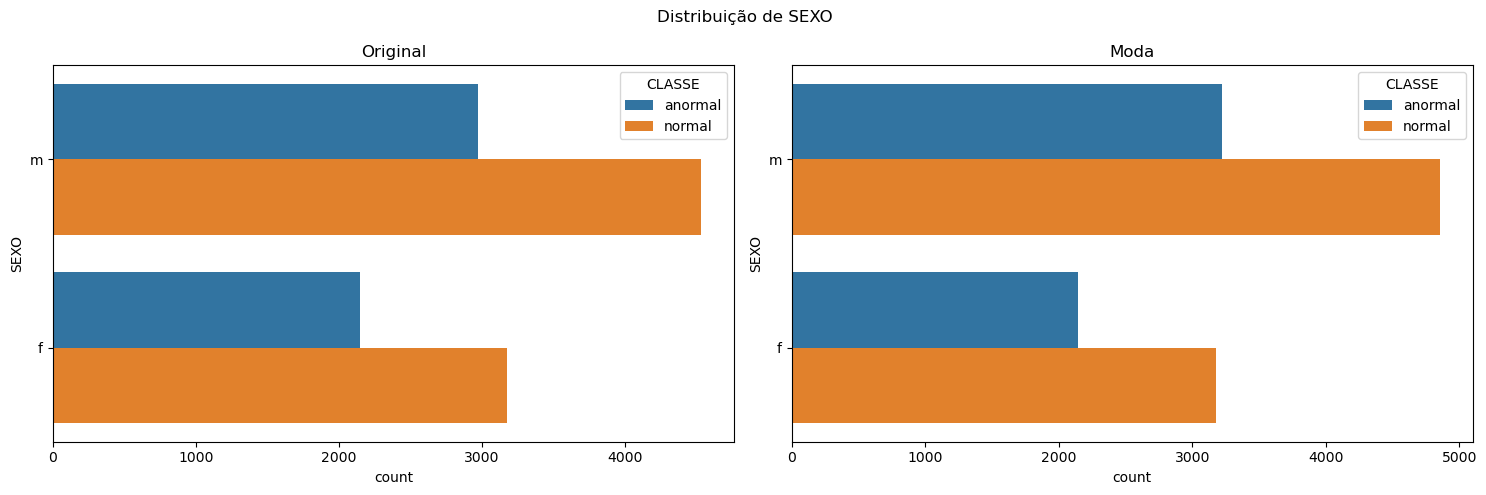

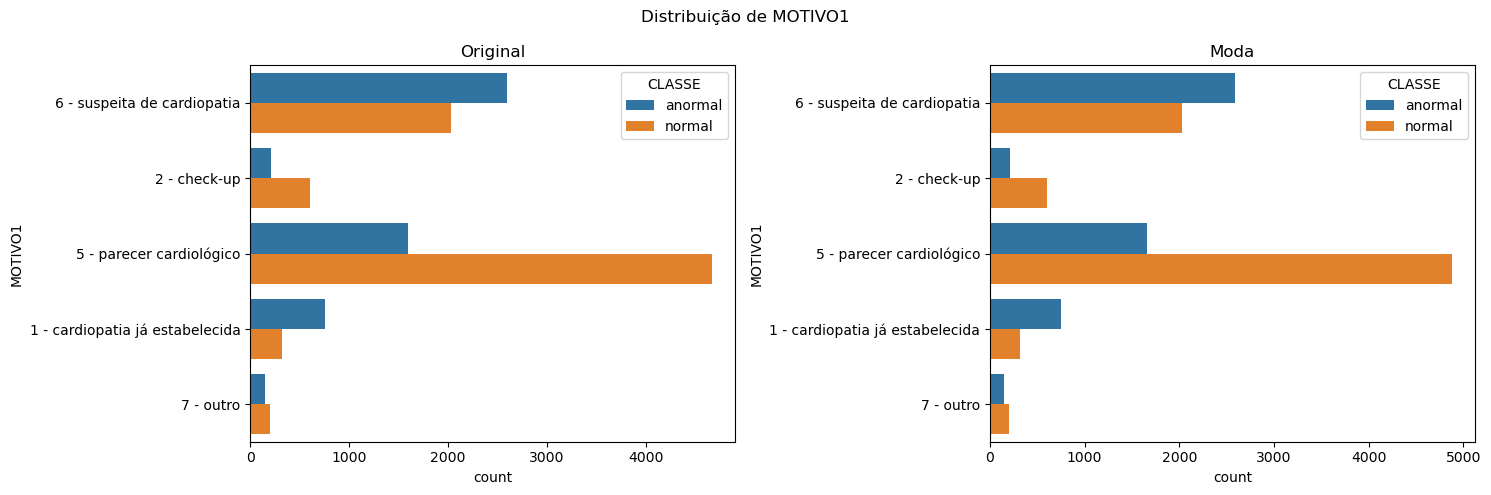

In [47]:
# COMPARANDO DISTRIBUIÇÃO ORIGINAL E DOS IMPUTADOS

df_imputed_moda = pd.concat([df_imputed_moda, df_train['CLASSE']], axis=1)

analise_valores_faltantes(df_train[col_categorica])

for coluna in col_categorica:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=False, sharey=False)
    fig.suptitle(f"Distribuição de {coluna}")
    # axes.set_xlabel("Valor")

    sns.countplot(df_train, y=coluna, ax=axes[0], hue='CLASSE')
    axes[0].set_title(f"Original")

    sns.countplot(df_imputed_moda, y=coluna, ax=axes[1], hue='CLASSE')
    axes[1].set_title(f"Moda")

    plt.tight_layout()    
    plt.show()


df_imputed_moda = df_imputed_moda.drop(columns=['CLASSE'])

In [48]:
# ADOÇÃO DOS MELHORES IMPUTERS

# TREINO
df_train[col_numerica] = df_train_imputed_3nn
df_train[col_categorica] = df_imputed_moda

# TESTE
df_test[col_numerica] = pd.DataFrame(imputador_3nn.transform(df_test[col_numerica]), columns=col_numerica)
df_test[col_categorica] = pd.DataFrame(imputador_moda.transform(df_test[col_categorica]), columns=col_categorica)

In [49]:
# EXLUIR DUPLICATAS (mesmos valores de atributos e mesma classifiação)

df_train = remover_duplicatas(df_train).reset_index(drop=True)
print("Conjunto de treino sem duplicatas: ", df_train.shape)

Conjunto de treino sem duplicatas:  (13153, 15)


In [50]:
# EXCLUIR INCONSISTÊNCIAS (mesmos valores de atributos e classificação diferente)

df_train = remover_inconsistencia(df_train).reset_index(drop=True)
print("Registros de treino sem inconsistências: ", df_train.shape)

Registros de treino sem inconsistências:  (13147, 15)


In [51]:
# GERANDO CODIFICADORES (já ajustado com o conjunto de treino!)

codificador_oneHot = codificador_nominais(df_train, col_nominal)

col_ordinal_categorias = [categoria_hda1, categoria_motivo1]
codificador_ordinal = codificador_ordinais(df_train, col_ordinal, col_ordinal_categorias) 

In [52]:
# TRANSFORMÇÃO SIMBÓLICO NUMÉRICO

# TREINO
df_train_encoded_nominal = pd.DataFrame(codificador_oneHot.transform(df_train[col_nominal]), columns=codificador_oneHot.get_feature_names_out(col_nominal))

# A ordem será alterada, para mantermos a classe no final ela vai ser separada temporariamente
classes = df_train.iloc[:, -1]
df_train = df_train.drop(columns=["CLASSE", "PULSOS", "B2", "SOPRO", "SEXO"])
# É adicionada novamente a coluna da classe
df_train = pd.concat([df_train, df_train_encoded_nominal], axis=1)
df_train = pd.concat([df_train, classes], axis=1)

df_train[col_ordinal] = pd.DataFrame(codificador_ordinal.transform(df_train[col_ordinal]), columns=col_ordinal)


# TESTE
df_test_encoded_nominal = pd.DataFrame(codificador_oneHot.transform(df_test[col_nominal]), columns=codificador_oneHot.get_feature_names_out(col_nominal))
df_test = df_test.drop(columns=["PULSOS", "PULSOS", "B2", "SOPRO", "SEXO"])
df_test = pd.concat([df_test, df_test_encoded_nominal], axis=1)

df_test[col_ordinal] = pd.DataFrame(codificador_ordinal.transform(df_test[col_ordinal]), columns=col_ordinal)

In [53]:
# CODIFICANDO ATRIBUTO ALVO

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['CLASSE'] = pd.DataFrame(le.fit_transform(df_train['CLASSE']), columns=['CLASSE'])

In [54]:
# ANALISANDO CORRELAÇÃO

matriz_correlacao(df_train, col_numerica+col_ordinal)

,IMC,Peso,Altura,IDADE,PA SISTOLICA,PA DIASTOLICA,FC,HDA 1,MOTIVO1
IMC,1.000000,0.656322,0.437257,0.364379,0.331155,0.211265,-0.225322,0.031674,-0.001281
Peso,0.656322,1.000000,0.703647,0.750739,0.451954,0.239930,-0.463131,0.067953,-0.001453
Altura,0.437257,0.703647,1.000000,0.502617,0.198985,0.080795,-0.306054,0.016019,-0.010440
IDADE,0.364379,0.750739,0.502617,1.000000,0.496908,0.227184,-0.582435,0.088815,-0.009978
PA SISTOLICA,0.331155,0.451954,0.198985,0.496908,1.000000,0.578198,-0.360558,0.054849,-0.013119
PA DIASTOLICA,0.211265,0.239930,0.080795,0.227184,0.578198,1.000000,-0.064461,0.037086,-0.060420
FC,-0.225322,-0.463131,-0.306054,-0.582435,-0.360558,-0.064461,1.000000,-0.003991,-0.027957
HDA 1,0.031674,0.067953,0.016019,0.088815,0.054849,0.037086,-0.003991,1.000000,-0.078776
MOTIVO1,-0.001281,-0.001453,-0.010440,-0.009978,-0.013119,-0.060420,-0.027957,-0.078776,1.000000


In [55]:
# GERAR NORMALIZADOR

normalizador_padrao = normalizador(df_train, df_train.columns[1:-1])

In [56]:
# NORMLAIZAR ATRIBUTOS

# TREINO
df_train.iloc[:, 1:-1] = pd.DataFrame(normalizador_padrao.transform(df_train.iloc[:, 1:-1]), columns=df_train.columns[1:-1])

# TESTE
df_test.iloc[:, 1:] = pd.DataFrame(normalizador_padrao.transform(df_test.iloc[:, 1:]), columns=df_test.columns[1:])


---
### Experimento

Nesta seção, o experimento deve ser conduzido, utilizando os protocolos experimentais padrões e testando diferentes modelos.

In [57]:
# GUARDAR DATAFRAME EM MATRIZES

X_train_og = df_train.iloc[:, :-1].values
Y_train_og = df_train.iloc[:, -1].values

X_test_og = df_test.values

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(X_train_og, Y_train_og, test_size=0.2, random_state=10)

kf = StratifiedKFold(n_splits=10, shuffle=True)

In [59]:
# K-VIZINHOS MAIS PRÓXIMOS
# sensível a escala (trabalha com dados normalizados)

# Talvez nao seja o melhor metodo ja que quando se tem uma dimensionalidade elevada objetos acabam ficando equidistantes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
k = [3, 5, 7, 9, 11, 13, 15, 17, 19, 21]
parametros = {'n_neighbors':k}

modelo_knn = GridSearchCV(knn, param_grid = parametros, cv=kf,)
modelo_knn.fit(X_train, y_train)

print("Melhor parâmetro: ", modelo_knn.best_params_)

Melhor parâmetro:  {'n_neighbors': 3}


In [60]:
knn = KNeighborsClassifier(n_neighbors=3)
cvscore_knn = cross_val_score(knn, X_train_og, Y_train_og, cv=kf)
print(cvscore_knn)

[0.66311787 0.64942966 0.65247148 0.6661597  0.66235741 0.65931559
 0.64030418 0.6499239  0.63926941 0.65449011]


In [61]:
# NAIVE BAYES
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

cvscore_gnb = cross_val_score(gnb, X_train_og, Y_train_og, cv=kf)
print(cvscore_gnb)

[0.92927757 0.92547529 0.91939163 0.9338403  0.9338403  0.93840304
 0.93307985 0.93302892 0.93150685 0.93987823]


In [62]:
# REGRESSÃO LOGIÍSTICA
# sensível a escala (trabalha com dados normalizados)

from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression(random_state=0, max_iter=2500)

cvscore_reg_log = cross_val_score(reg_log, X_train_og, Y_train_og, cv=kf)
print(cvscore_reg_log)

[0.93460076 0.92243346 0.921673   0.93307985 0.93688213 0.93460076
 0.9460076  0.93835616 0.92541857 0.92694064]


In [65]:
# REDES NEURAIS ARTIFICIAIS
# sensível a escala (trabalha com dados normalizados)
from sklearn.neural_network import MLPClassifier

#rna1 = MLPClassifier(alpha=0.0001, hidden_layer_sizes=(100,100,50), max_iter=600, solver='adam', activation='relu', learning_rate='adaptive', random_state=10)
#rna2 = MLPClassifier(alpha=0.0001, hidden_layer_sizes=(50,50,20,20,20), max_iter=400, solver='adam', activation='relu', learning_rate='adaptive', random_state=10)
#rna3 = MLPClassifier(alpha=0.0001, hidden_layer_sizes=(50,50,20,10), max_iter=700, solver='adam', activation='relu', learning_rate='adaptive', random_state=10)
rna4 = MLPClassifier(alpha=0.0001, hidden_layer_sizes=(50,50,20,20,20), max_iter=300, solver='adam', activation='relu', learning_rate='adaptive', random_state=10)
#rna5 = MLPClassifier(alpha=0.0001, hidden_layer_sizes=(60,30), max_iter=200, solver='adam', activation='relu', learning_rate='adaptive', random_state=10)

#cvscore_rna1 = cross_val_score(rna1, X_train_og, Y_train_og, cv=kf)
#cvscore_rna2 = cross_val_score(rna2, X_train_og, Y_train_og, cv=kf)
#cvscore_rna3 = cross_val_score(rna3, X_train_og, Y_train_og, cv=kf)
cvscore_rna4 = cross_val_score(rna4, X_train_og, Y_train_og, cv=kf)
#cvscore_rna5 = cross_val_score(rna5, X_train_og, Y_train_og, cv=kf)

#print(cvscore_rna1)
#print(cvscore_rna2)
#print(cvscore_rna3)
print(cvscore_rna4)
#print(cvscore_rna5)

[0.91711027 0.62737643 0.93460076 0.93688213 0.92091255 0.68288973
 0.93231939 0.63318113 0.9261796  0.84094368]


In [64]:
# MÁQUINAS DE VETORES DE SUPORTE
# sensível a escala (trabalha com dados normalizados)
from sklearn.svm import SVC

svc1 = SVC(kernel='rbf',C=30,gamma=0.01,class_weight='balanced',probability=True,random_state=10)
svc2 = SVC(kernel='rbf',C=1,gamma='scale',class_weight='balanced',probability=True,random_state=10)

cvscore_svc1 = cross_val_score(svc1, X_train_og, Y_train_og, cv=kf)
cvscore_svc2 = cross_val_score(svc2, X_train_og, Y_train_og, cv=kf)

print(cvscore_svc1)
print(cvscore_svc2)

[0.83422053 0.83802281 0.82053232 0.82737643 0.82889734 0.82205323
 0.83346008 0.81811263 0.84322679 0.84246575]
[0.5026616  0.52775665 0.50570342 0.50190114 0.52015209 0.52547529
 0.53307985 0.49467275 0.51902588 0.52359209]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Parâmetros para ajuste
param_grids = {
    "KNN": {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"]
    },
    "Naive Bayes": {},  # GaussianNB não tem hiperparâmetros ajustáveis relevantes
    "Logistic Regression": {
        "C": [0.1, 1, 10],
        "solver": ["lbfgs", "liblinear"]
    },
    "Neural Network": {
        "hidden_layer_sizes": [(50,), (100,), (100, 50)],
        "alpha": [0.0001, 0.001, 0.01]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"],
        "gamma": ["scale", "auto"]
    }
}

# Modelos disponíveis
models = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Neural Network": MLPClassifier(max_iter=1000, random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Avaliação de modelos
def evaluate_models(models, param_grids, X_train, y_train, X_test, y_test):
    results = {}

    for name, model in models.items():
        print(f"\nEvaluating {name}...")
        
        # Ajuste de hiperparâmetros, se aplicável
        if name in param_grids and param_grids[name]:
            grid_search = GridSearchCV(model, param_grid=param_grids[name], cv=5, scoring="accuracy")
            grid_search.fit(X_train, y_train)
            best_model = grid_search.best_estimator_
            print(f"Best parameters for {name}: {grid_search.best_params_}")
        else:
            # Caso sem ajuste de hiperparâmetros
            best_model = model
            best_model.fit(X_train, y_train)

        # Predição
        y_pred = best_model.predict(X_test)

        # Métricas
        acc = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)

        results[name] = {
            "Accuracy": acc,
            "Confusion Matrix": conf_matrix,
            "Classification Report": class_report
        }

        print(f"Accuracy: {acc:.4f}")
        print("Confusion Matrix:")
        print(conf_matrix)
        print("Classification Report:")
        print(class_report)

    return results



Evaluating KNN...
Best parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 0.6475
Confusion Matrix:
[[ 477  557]
 [ 370 1226]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.46      0.51      1034
           1       0.69      0.77      0.73      1596

    accuracy                           0.65      2630
   macro avg       0.63      0.61      0.62      2630
weighted avg       0.64      0.65      0.64      2630


Evaluating Naive Bayes...
Accuracy: 0.9304
Confusion Matrix:
[[ 901  133]
 [  50 1546]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1034
           1       0.92      0.97      0.94      1596

    accuracy                           0.93      2630
   macro avg       0.93      0.92      0.93      2630
weighted avg       0.93      0.93      0.93      2630


Evaluating Logistic Regression...


c:\Bia\Programas\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Bia\Programas\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Accuracy: 0.9312
Confusion Matrix:
[[ 898  136]
 [  45 1551]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      1034
           1       0.92      0.97      0.94      1596

    accuracy                           0.93      2630
   macro avg       0.94      0.92      0.93      2630
weighted avg       0.93      0.93      0.93      2630


Evaluating Neural Network...
Best parameters for Neural Network: {'alpha': 0.0001, 'hidden_layer_sizes': (100, 50)}
Accuracy: 0.7342
Confusion Matrix:
[[979  55]
 [644 952]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.95      0.74      1034
           1       0.95      0.60      0.73      1596

    accuracy                           0.73      2630
   macro avg       0.77      0.77      0.73      2630
weighted avg       0.81      0.73      0.73 

---
### Análise dos Resultados

Nesta seção, os resultados devem ser exibidos através de tabelas e gráficos, comparados e profundamente analisados.